# Fake News Detection - Reliable Source or Not
#### Author : Anjana Eldo

#### From the kaggle news dataset, Checking whether the news is from reliable source and how much relaible 
#### it is by using content - based approach : bag of words and context - based approach: sentiment analysis,
#### puntuation etc.


In [ ]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [213]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [214]:
# reading data from csv
df = pd.read_csv('/Users/andrew/Documents/MS - SJSU/kaggle_news_dataset.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [215]:
df.shape

(426550, 17)

In [216]:
df.head()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,21,bipartisanreport.com,clickbait,http://bipartisanreport.com/cdn-cgi/l/email-pr...,The website from which you got to this page is...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Email Protection,NaN,NaN,[''],NaN,NaN,NaN,NaN
1,1,22,theshovel.com.au,satire,http://www.theshovel.com.au/tag/malcolm-turnbu...,"For as long as he can remember, Malcolm Turnbu...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,malcolm turnbull satire – The Shovel,The Shovel,NaN,[''],NaN,"3, 2",NaN,NaN
2,2,54,blackagendareport.com,unreliable,https://blackagendareport.com/what-western-imp...,What Western Imperialism Is Up to Now in Zimba...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,What Western Imperialism Is Up to Now in Zimbabwe,"Bruce A. Dixon, Bar Managing Editor, Glen Ford...",NaN,[''],“The capitalist agenda is to neo-colonize Zimb...,NaN,NaN,NaN
3,3,61,barenakedislam.com,hate,http://barenakedislam.com/2018/01/08/wow-irani...,We appreciate your help! Click here to donate\...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,WOW! Iranian-Canadian protesters love Donald T...,"Cleavis Nowell, Don Spilman, Rick Oneil, Linda...",NaN,[''],NaN,NaN,NaN,NaN
4,4,64,blackagendareport.com,unreliable,https://blackagendareport.com/articlelist/afri...,“The massacre of the mine workers in August of...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Black Agenda Report,"Ann Garrison, Bar Contributor, Boniface Musavu...",NaN,[''],NaN,NaN,NaN,NaN


In [217]:
df = df.set_index('Unnamed: 0')

In [218]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
0,21,bipartisanreport.com,clickbait,http://bipartisanreport.com/cdn-cgi/l/email-pr...,The website from which you got to this page is...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Email Protection,NaN,NaN,[''],NaN,NaN,NaN,NaN
1,22,theshovel.com.au,satire,http://www.theshovel.com.au/tag/malcolm-turnbu...,"For as long as he can remember, Malcolm Turnbu...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,malcolm turnbull satire – The Shovel,The Shovel,NaN,[''],NaN,"3, 2",NaN,NaN
2,54,blackagendareport.com,unreliable,https://blackagendareport.com/what-western-imp...,What Western Imperialism Is Up to Now in Zimba...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,What Western Imperialism Is Up to Now in Zimbabwe,"Bruce A. Dixon, Bar Managing Editor, Glen Ford...",NaN,[''],“The capitalist agenda is to neo-colonize Zimb...,NaN,NaN,NaN
3,61,barenakedislam.com,hate,http://barenakedislam.com/2018/01/08/wow-irani...,We appreciate your help! Click here to donate\...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,WOW! Iranian-Canadian protesters love Donald T...,"Cleavis Nowell, Don Spilman, Rick Oneil, Linda...",NaN,[''],NaN,NaN,NaN,NaN
4,64,blackagendareport.com,unreliable,https://blackagendareport.com/articlelist/afri...,“The massacre of the mine workers in August of...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Black Agenda Report,"Ann Garrison, Bar Contributor, Boniface Musavu...",NaN,[''],NaN,NaN,NaN,NaN


In [219]:
#Check the types present in the csv
df.groupby(["type"]).size()

type
2018-02-10 13:43:39.521661        1
bias                          56914
clickbait                     11572
conspiracy                    41640
fake                          44460
hate                           3817
junksci                        5990
political                     82976
reliable                      96024
rumor                         24103
satire                         5732
unknown                       18343
unreliable                    14828
dtype: int64

In [220]:
#Removing unwanted rows

remove = set(['2018-02-10 13:43:39.521661','bias','clickbait','conspiracy','fake','hate','junksci','political','rumor',
             'satire','unknown'])
df = df[~df['type'].isin(['2018-02-10 13:43:39.521661','bias','clickbait','conspiracy','fake','hate','junksci','political','rumor',
             'satire','unknown'])]



In [221]:
df.duplicated().sum()

1

In [222]:
df.type

Unnamed: 0
2         unreliable
4         unreliable
5           reliable
8           reliable
9           reliable
16          reliable
26        unreliable
32        unreliable
37        unreliable
38        unreliable
40        unreliable
46          reliable
47        unreliable
48        unreliable
55        unreliable
59        unreliable
60        unreliable
62        unreliable
66        unreliable
81        unreliable
87        unreliable
88        unreliable
89          reliable
91        unreliable
96          reliable
97        unreliable
99        unreliable
108       unreliable
109       unreliable
111         reliable
             ...    
426520      reliable
426521      reliable
426522      reliable
426523      reliable
426524      reliable
426525      reliable
426526      reliable
426527      reliable
426528      reliable
426529      reliable
426530      reliable
426531      reliable
426532      reliable
426533      reliable
426534      reliable
426535      reliable
42

In [223]:
#Checking to see how many null values are present
df.isnull().sum()

id                       1
domain                   5
type                 20150
url                      5
content                  5
scraped_at               5
inserted_at              5
updated_at               5
title                   23
authors              55950
keywords            131002
meta_keywords        17137
meta_description     42184
tags                108113
summary             131002
source               36632
dtype: int64

In [224]:
#Listing out the rows which have null values
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())

             id                 domain        type  \
Unnamed: 0                                           
2            54  blackagendareport.com  unreliable   
4            64  blackagendareport.com  unreliable   
5           107      christianpost.com    reliable   
8           197      christianpost.com    reliable   
9           210      christianpost.com    reliable   

                                                          url  \
Unnamed: 0                                                      
2           https://blackagendareport.com/what-western-imp...   
4           https://blackagendareport.com/articlelist/afri...   
5           https://www.christianpost.com/news/chick-fil-a...   
8           https://www.christianpost.com/news/indonesian-...   
9           https://www.christianpost.com/news/china-churc...   

                                                      content  \
Unnamed: 0                                                      
2           What Western Imperialis

In [225]:

#Removing all null values

all_news = df[df.type.notnull()]



In [226]:
df_stopwords = df

In [227]:
df_stopwords.head(5)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
2,54,blackagendareport.com,unreliable,https://blackagendareport.com/what-western-imp...,What Western Imperialism Is Up to Now in Zimba...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,What Western Imperialism Is Up to Now in Zimbabwe,"Bruce A. Dixon, Bar Managing Editor, Glen Ford...",NaN,[''],“The capitalist agenda is to neo-colonize Zimb...,NaN,NaN,NaN
4,64,blackagendareport.com,unreliable,https://blackagendareport.com/articlelist/afri...,“The massacre of the mine workers in August of...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Black Agenda Report,"Ann Garrison, Bar Contributor, Boniface Musavu...",NaN,[''],NaN,NaN,NaN,NaN
5,107,christianpost.com,reliable,https://www.christianpost.com/news/chick-fil-a...,(Screenshot:Chick-fil-A) A Chick-fil-A restaur...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Chick-fil-A Kicks Out Breastfeeding Mom, Warni...",NaN,NaN,[''],"A Chick-fil-A restaurant in Fargo, North Dakot...",NaN,NaN,NaN
8,197,christianpost.com,reliable,https://www.christianpost.com/news/indonesian-...,(Photo: REUTERS/Brian Snyder) Demonstrators ho...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Indonesian Christians Fighting Trump Deportati...,NaN,NaN,[''],The plight of around 50 Indonesian Christians ...,NaN,NaN,NaN
9,210,christianpost.com,reliable,https://www.christianpost.com/news/china-churc...,An evangelical megachurch was destroyed by Chi...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,The Destruction of China's Churches,NaN,NaN,[''],An evangelical megachurch was destroyed by Chi...,NaN,NaN,NaN


### Removing Stopwords

In [228]:
df_stopwords = df[df.type.notnull()]
df_stopwords = df[df.url.notnull()]
df_stopwords = df[df.content.notnull()]
df_stopwords = df[df.scraped_at.notnull()]
df_stopwords = df[df.inserted_at.notnull()]
df_stopwords = df[df.keywords.notnull()]
df_stopwords = df[df.updated_at.notnull()]
df_stopwords = df[df.authors.notnull()]
df_stopwords = df[df.meta_description.notnull()]
df_stopwords = df[df.tags.notnull()]
df_stopwords = df[df.source.notnull()]
df_stopwords = df[df.meta_keywords.notnull()]
df_stopwords = df[df.summary.notnull()]


In [229]:

#Removing Stopwords such as 'this','I' which has very low importance as keywords
import nltk
#nltk.download()
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_stopwords['stopwords'] = df_stopwords['title'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_stopwords[['title','stopwords']].head()





,title,stopwords
Unnamed: 0,,


In [230]:
y = all_news.type

In [231]:
y

Unnamed: 0
2         unreliable
4         unreliable
5           reliable
8           reliable
9           reliable
16          reliable
26        unreliable
32        unreliable
37        unreliable
38        unreliable
40        unreliable
46          reliable
47        unreliable
48        unreliable
55        unreliable
59        unreliable
60        unreliable
62        unreliable
66        unreliable
81        unreliable
87        unreliable
88        unreliable
89          reliable
91        unreliable
96          reliable
97        unreliable
99        unreliable
108       unreliable
109       unreliable
111         reliable
             ...    
426520      reliable
426521      reliable
426522      reliable
426523      reliable
426524      reliable
426525      reliable
426526      reliable
426527      reliable
426528      reliable
426529      reliable
426530      reliable
426531      reliable
426532      reliable
426533      reliable
426534      reliable
426535      reliable
42

### Splitting the Dataset for Training and Testing

In [232]:
all_news = all_news.drop('type', axis=1)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(all_news['title'], y, test_size=0.33, random_state=53)

### Using CountVectorizer and TF-IDF Vectorizers

* To get an idea about the words in the news articles are from reliable source or not I am using CountVectorizer and TfidfVectorizer.
* As the max_df in tfidf is 0.7 it removes words which appear more than 70% in the articles


In [234]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.astype('U'))
count_test = count_vectorizer.transform(X_test.astype('U'))

In [235]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train.astype('U'))
tfidf_test = tfidf_vectorizer.transform(X_test.astype('U'))

### Plotting Confusion Matrix

In [236]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### NLP using MultinomialNB - A content only classifier

In [237]:
clf = MultinomialNB()

In [238]:
y_train

Unnamed: 0
392180      reliable
423992      reliable
393862      reliable
333775      reliable
45669     unreliable
377207      reliable
398279      reliable
419396      reliable
368066      reliable
423296      reliable
134616    unreliable
426321      reliable
410391      reliable
46926     unreliable
381393      reliable
20959       reliable
379910      reliable
373445      reliable
397489      reliable
344351      reliable
386079      reliable
48383     unreliable
389578      reliable
380479      reliable
387494      reliable
375939      reliable
355807      reliable
424871      reliable
356985      reliable
45556     unreliable
             ...    
393021      reliable
383573      reliable
153033    unreliable
409097      reliable
43833     unreliable
356703      reliable
248503    unreliable
366413      reliable
342314      reliable
362072      reliable
152652    unreliable
392445      reliable
344491      reliable
384503      reliable
345195      reliable
383675      reliable
38

accuracy:   0.957
Confusion matrix, without normalization


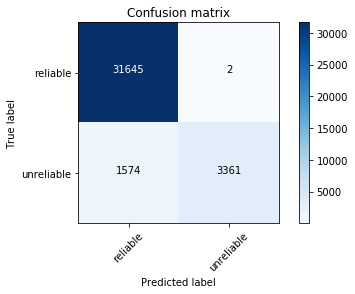

In [239]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['reliable', 'unreliable'])
plot_confusion_matrix(cm, classes=['reliable', 'unreliable'])

* The top left and bottom right shows the correct values
* The bottom left and top right shows false positives and negatives
* The model gave an accuracy of 95%

In [240]:
clf = MultinomialNB()

accuracy:   0.964
Confusion matrix, without normalization


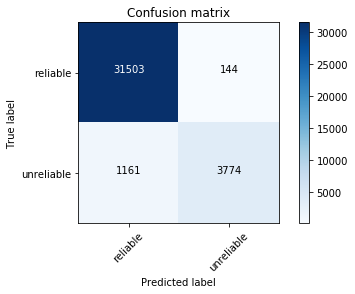

In [241]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['reliable', 'unreliable'])
plot_confusion_matrix(cm, classes=['reliable', 'unreliable'])

In [242]:
#Removing Stopwords such as 'this','I' which has very low importance as keywords

from nltk.corpus import stopwords
import string

stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

In [243]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.952
Confusion matrix, without normalization


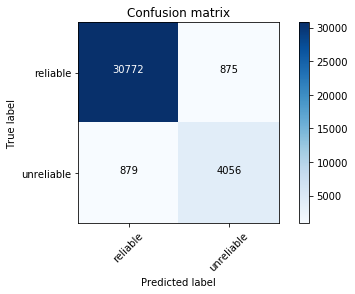

In [244]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['reliable', 'unreliable'])
plot_confusion_matrix(cm, classes=['reliable', 'unreliable'])

In [245]:
clf = MultinomialNB(alpha=0.1)

In [246]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.95924
Alpha: 0.10 Score: 0.96362
Alpha: 0.20 Score: 0.96307
Alpha: 0.30 Score: 0.96214
Alpha: 0.40 Score: 0.96157
Alpha: 0.50 Score: 0.96066
Alpha: 0.60 Score: 0.95982
Alpha: 0.70 Score: 0.95938
Alpha: 0.80 Score: 0.95793
Alpha: 0.90 Score: 0.95730


In [247]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=50)

reliable -8.935379384971606 review
reliable -8.715571034874554 com
reliable -8.616788375733492 zee
reliable -8.485874994737902 briefing
reliable -8.293282736529033 flash
reliable -8.144550410979559 alternate
reliable -7.987085669722855 aspirations
reliable -7.948321544945539 artist
reliable -7.930937745484268 meets
reliable -7.430309419741111 knock
reliable -7.2553650601941015 notice
reliable -7.245661977907956 brooklyn
reliable -7.000343184070064 advance
reliable -6.9955248775375125 dongles
reliable -6.809865612938595 privileges
reliable -6.808828853380694 sway
reliable -6.804956644637459 owner
reliable -6.695722715981967 worry
reliable -6.547955147924733 abc
reliable -6.313870568336744 recognition
reliable -6.3079539542480845 chronicle
reliable -6.303170868379813 post
reliable -6.239444774279255 politics
reliable -6.188626284179117 filing
reliable -6.179426705314724 birthday
reliable -6.139338003239333 deluge
reliable -6.073157552087912 happy
reliable -5.994171942273816 turmoil
relia